In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """


Downloading Dataset from Kaggle

In [ ]:
#!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


Fin código de importación de Dataset de Kaggle

In [5]:
os.chdir('/content/gdrive/My Drive/Kaggle/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
      y.append((i[0:1]))
os.chdir('/content/gdrive/My Drive/Kaggle/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(28,28))
      X.append(img)
for i in range(1,99):
    y.append('N')

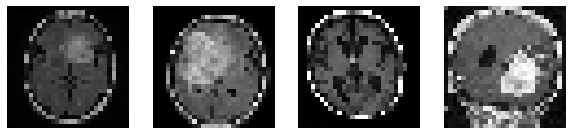

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (28, 28, 3)
Shape of an image in X_test:  (28, 28, 3)


In [8]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [9]:
print("X_train Shape: ", X_train.shape), print("X_test Shape: ", X_test.shape), print("y_train Shape: ", y_train.shape), print("y_test Shape: ", y_test.shape)


X_train Shape:  (169, 28, 28, 3)
X_test Shape:  (84, 28, 28, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


(None, None, None, None)

In [11]:
m1=Sequential()
m1.add(BatchNormalization(input_shape = (28,28,3)))
m1.add(Convolution2D(32, (3,3), activation ='relu', input_shape = (28, 28, 3))) 
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=64, kernel_size=4, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=3, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Convolution2D(filters=128, kernel_size=2, padding='same', activation='relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))
m1.add(Flatten()) 
m1.add(Dense(units=128,activation = 'relu'))
m1.add(Dense(units = 64, activation = 'relu'))
m1.add(Dense(units = 32, activation = 'relu'))
m1.add(Dense(units = 2, activation = 'softmax'))

In [12]:
m1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
history = m1.fit(X_train,y_train,
                    epochs=50, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/50
6/6 [==============================] - 0s 58ms/step - loss: 0.6495 - accuracy: 0.6568 - val_loss: 4.0284 - val_accuracy: 0.6071
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.7576 - accuracy: 0.6272 - val_loss: 0.5964 - val_accuracy: 0.7976
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.6450 - val_loss: 0.6688 - val_accuracy: 0.6071
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 0.6212 - accuracy: 0.6627 - val_loss: 0.8241 - val_accuracy: 0.6071
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5740 - accuracy: 0.7396 - val_loss: 1.3075 - val_accuracy: 0.6071
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.5115 - accuracy: 0.7456 - val_loss: 1.1064 - val_accuracy: 0.6310
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.7870 - val_loss: 1.4178 - val_accuracy: 0.6071
Epoch 8/50
6/6 [=================

3/3 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.8810


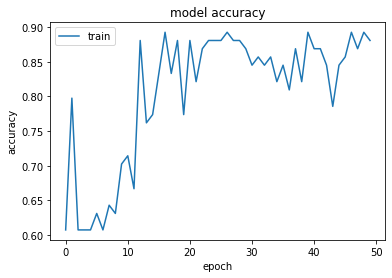

In [14]:
m1.evaluate(X_test,y_test)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

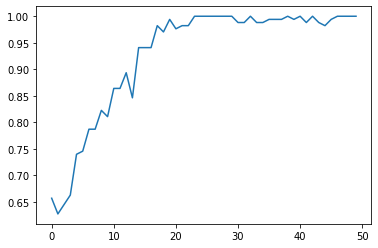

In [15]:
plt.plot(history.history['accuracy'])

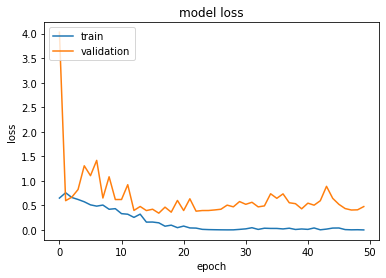

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


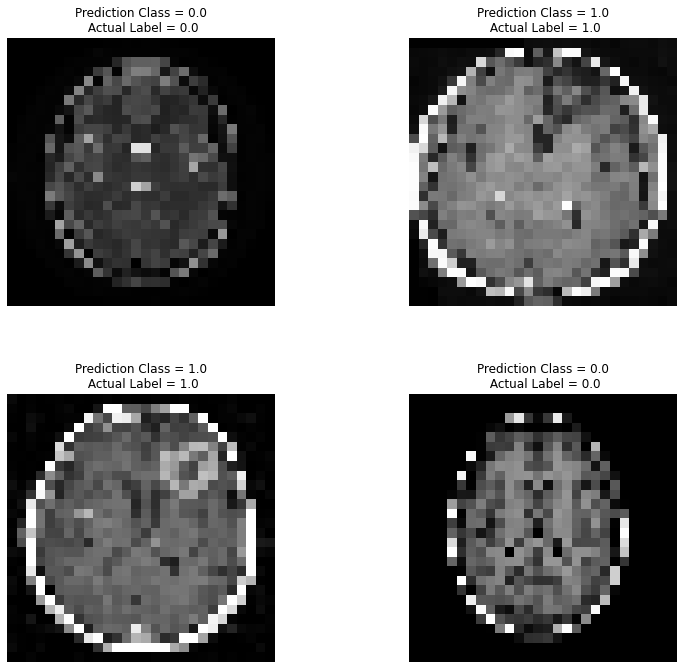

In [17]:
y_predicted=m1.predict_classes(X_test)
y_actual=np.argmax(y_test,axis=1)
L = 2
W = 2
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction Class = {y_predicted[i]:0.1f}\n Actual Label = {y_actual[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.86      0.96      0.91        51

    accuracy                           0.88        84
   macro avg       0.89      0.86      0.87        84
weighted avg       0.89      0.88      0.88        84



In [19]:
#confusion_matrix to check in accuracy 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual, y_predicted)
print(cm)

[[25  8]
 [ 2 49]]


In [20]:
# Métricas

presicion = 0
recall = 0
f1score = 0 
accuracy = 0


In [24]:
# Para 0

truePositive = 25
trueNegative = 0 #NO HAY
falsePositive = 2
falseNegative = 8

presicion = truePositive/(truePositive + falsePositive)
recall = truePositive/(truePositive + falseNegative)
f1score = 2*presicion*recall/(presicion + recall)
accuracy = (truePositive + trueNegative)/(truePositive + falsePositive + trueNegative + falseNegative)

print("Precision: ", presicion),
print("Recall: ", recall), 
print("F1-Score: ", f1score), 
print("Accuracy", accuracy)

Precision:  0.9259259259259259
Recall:  0.7575757575757576
F1-Score:  0.8333333333333334
Accuracy 0.7142857142857143


In [25]:
# Para 1

truePositive = 49
trueNegative = 0 #NO HAY
falsePositive = 8
falseNegative = 2

presicion = truePositive/(truePositive + falsePositive)
recall = truePositive/(truePositive + falseNegative)
f1score = 2*presicion*recall/(presicion + recall)
accuracy = (truePositive + trueNegative)/(truePositive + falsePositive + trueNegative + falseNegative)

print("Precision: ", presicion),
print("Recall: ", recall), 
print("F1-Score: ", f1score), 
print("Accuracy", accuracy)

Precision:  0.8596491228070176
Recall:  0.9607843137254902
F1-Score:  0.9074074074074074
Accuracy 0.8305084745762712
